In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import libem
import numpy as np
from libvis import Visualizations
import matplotlib.pyplot as plt

from components import *

In [18]:
sim = libem.EMSimulationSpace3D(space_size=(4, 2, 2), top_left=(-2, -1, -1), scale=30)

V_OUTER = 1
V_INNER = -5

sim.compute(make_enforcer(
    enf(EMObjects.planar_mesh_3d, (0.2, -0.8, -0.8), 0, (0.1, 1.6, 1.6), (0.2, 0.2), 0.1, V_OUTER),
    enf(EMObjects.planar_mesh_3d, (0, -0.8, -0.8), 0, (0.1, 1.6, 1.6), (0.2, 0.2), 0.1, V_INNER),
    enf(EMObjects.planar_mesh_3d, (-0.2, -0.8, -0.8), 0, (0.1, 1.6, 1.6), (0.2, 0.2), 0.1, V_OUTER),
))
sim.get_efield()
print("Done.")

Computed in 2323 iterations.
Done.


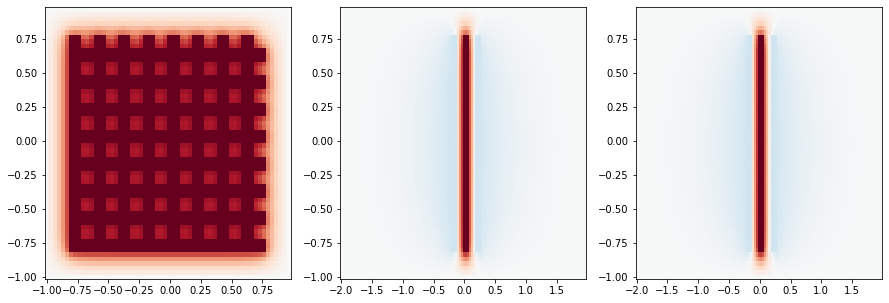

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    sim2d = libem.EMSimulationSpace2D.from_3d(sim, axis=i, location=0)
    Visualizations.colormesh_2d(sim2d, graph_ax=ax)
    #Visualizations.efield_2d(sim2d, graph_ax=ax)


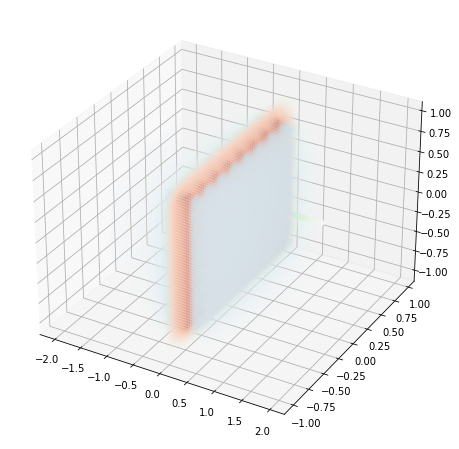

In [20]:
particle = libem.ChargedParticle3D(sim, 0.1, -1, (1.5, 0.125, 0.125), (-0.2, 0, 0), bounce=1)
particle.compute_motion((0, 10))

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
Visualizations.colormesh_3d(sim, resolution=1, graph_ax=ax)
Visualizations.trajectory_3d(particle.time, particle.position, graph_ax=ax)
plt.show()

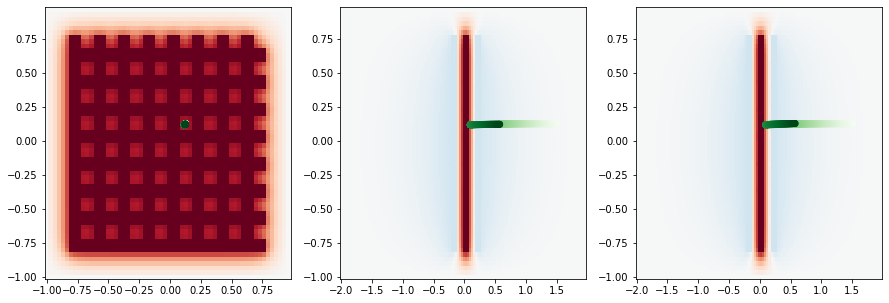

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    sim2d = libem.EMSimulationSpace2D.from_3d(sim, axis=i)
    Visualizations.colormesh_2d(sim2d, graph_ax=ax)
    Visualizations.trajectory_2d(particle.time, particle.position, axis=i, graph_ax=ax)
